<a href="https://colab.research.google.com/github/rmehdi1/CommunityProject_Mobilize/blob/main/ChangeOrgAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import pandas as pd
import os

# Import Data

In [3]:
# Download latest version of the dataset
path = kagglehub.dataset_download("muhammedabdulazeem/petitions-from-changeorg")
print("Path to dataset files:", path)

# Define dataset path
dataset_path = "/root/.cache/kagglehub/datasets/muhammedabdulazeem/petitions-from-changeorg/versions/1"

# Load the CSV file into a DataFrame
df = pd.read_csv(os.path.join(dataset_path, "results.csv"))

100%|██████████| 4.06M/4.06M [00:00<00:00, 112MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/muhammedabdulazeem/petitions-from-changeorg/versions/1


/tmp/ipython-input-3-1786828998.py:9: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(dataset_path, "results.csv"))


**Dataset Details: Petitions from Change.org**

This project uses the **“Petitions from Change.org”** dataset from Kaggle, which contains over **24,000 public petitions** collected from [Change.org](https://www.change.org) using web scraping techniques (via the Python library `scrapy`). It contains petions Petitions span a wide range of social, environmental, and political issues.


**Why Change.Org:**

Change.org is the world’s largest online petition platform, making it an ideal source for studying grassroots campaign messaging. Its rich success metrics (like signatures and victories) offer measurable insights into what makes advocacy messaging effective.

See More about it at:
https://www.change.org/about

https://www.linkedin.com/company/change-org/




# Inspecting Datset

In [4]:
df.head()

,Unnamed: 0,petition_id,petition_ask,created_at,deleted_at,original_locale,title,description,targeting_description,letter_body,...,total_signup_count,supporter_message_count,hide_comments,hide_dm_action_panel,enable_human_verification,display_title,petition_title,petition_status,calculated_goal,progress
0,0,28127009,Free Kusha and reunite elephant pair,2021-04-01T00:07:47Z,NaN,en-IN,Karnataka Forest Department: Free Kusha and re...,"<p>Kusha, a male elephant from Dubare Elephant...","karnataka forest department, People for the Et...",Free Kusha and reunite elephant pair,...,84,NaN,False,False,False,Karnataka Forest Department: Free Kusha and re...,Karnataka Forest Department: Free Kusha and re...,active,7500,88.106667
1,1,28569017,Save Caracal cat in india,2021-04-25T19:56:09Z,NaN,en-IN,"Save Caracal cat in India: @BoardWelfare, @Man...",<p>#savefloppainindia trend and sharing this p...,Shri Prakash Javedkar (Cabinet Minister - Mini...,Save Caracal cat in india,...,8,NaN,False,False,False,"Save Caracal cat in India: @BoardWelfare, @Man...","Save Caracal cat in India: @BoardWelfare, @Man...",active,5000,52.920000
2,2,28566320,"Animal Treatment and ABC Centre for Borivli, K...",2021-04-25T15:40:17Z,NaN,en-IN,Municipal Commissioner of Mumbai: Animal Treat...,"<p>In Kandivli, Borivli Dahisar (Ward R), lack...",Municipal Commissioner of Mumbai,"Animal Treatment and ABC Centre for Borivli, K...",...,108,NaN,False,False,False,Municipal Commissioner of Mumbai: Animal Treat...,Municipal Commissioner of Mumbai: Animal Treat...,active,2500,94.680000
3,3,28543362,Seven Sebastian to say the N word once Unbanne...,2021-04-24T06:29:05Z,NaN,en-IN,Facebook: Seven Sebastian to say the N word on...,<p>SVen sebaAstian was banned on Fb and that w...,"Facebook, Germany",Seven Sebastian to say the N word once Unbanne...,...,2,NaN,False,False,False,Facebook: Seven Sebastian to say the N word on...,Facebook: Seven Sebastian to say the N word on...,active,100,6.000000
4,4,28471106,"Don't buy animals, Adopt them!",2021-04-20T03:45:00Z,NaN,en-IN,People for the Ethical Treatment of Animals (P...,<p>I feel that animals are not just a thing to...,People for the Ethical Treatment of Animals (P...,"Don't buy animals, Adopt them!",...,46,NaN,False,False,False,People for the Ethical Treatment of Animals (P...,People for the Ethical Treatment of Animals (P...,active,500,97.200000


In [5]:
df.describe()


,Unnamed: 0,petition_id,deleted_at,goal,lat,long,displayed_signature_count,total_signature_count,weekly_signature_count,total_page_views,total_share_count,daily_signature_count,monthly_signature_count,daily_signup_count,weekly_signup_count,monthly_signup_count,total_signup_count,supporter_message_count,calculated_goal,progress
count,24065.00000,2.406500e+04,0.0,25.000000,21844.000000,21844.000000,2.406500e+04,2.406500e+04,24065.000000,2.406500e+04,2.406500e+04,24065.000000,24065.000000,24065.000000,24065.000000,24065.000000,24065.000000,0.0,2.406500e+04,24065.000000
mean,12032.00000,2.512415e+07,NaN,24988.000000,20.658804,78.641688,8.002824e+03,7.006357e+03,236.993601,1.038450e+04,2.573867e+03,58.250031,491.874257,0.626512,13.962394,51.625390,1164.662373,NaN,1.075256e+04,48.226989
std,6947.11145,3.898197e+06,NaN,19856.239993,3.031797,8.266192,5.252928e+04,4.335863e+04,2373.335908,1.096157e+05,2.794019e+04,859.720190,3582.964189,7.928881,265.901304,586.680897,14908.715998,NaN,7.203991e+04,30.699688
min,0.00000,3.433500e+04,NaN,700.000000,-29.532800,-122.000000,5.000000e+00,5.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000e+02,5.000000
25%,6016.00000,2.315384e+07,NaN,3000.000000,20.593700,78.962900,1.500000e+01,1.500000e+01,0.000000,8.000000e+01,1.200000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,NaN,1.000000e+02,15.000000
50%,12032.00000,2.630225e+07,NaN,25000.000000,20.593700,78.962900,8.000000e+01,8.000000e+01,0.000000,2.740000e+02,3.800000e+01,0.000000,1.000000,0.000000,0.000000,0.000000,16.000000,NaN,1.000000e+02,52.300000
75%,18048.00000,2.806185e+07,NaN,50000.000000,20.593700,78.962900,6.410000e+02,6.410000e+02,1.000000,1.288000e+03,2.120000e+02,0.000000,16.000000,0.000000,0.000000,2.000000,96.000000,NaN,1.000000e+03,76.026667
max,24064.00000,2.867789e+07,NaN,50000.000000,55.378100,145.491000,1.004861e+06,1.002221e+06,55762.000000,3.707960e+06,1.015223e+06,21713.000000,75298.000000,228.000000,13861.000000,22606.000000,571196.000000,NaN,1.500000e+06,99.933333


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24065 entries, 0 to 24064
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 24065 non-null  int64  
 1   petition_id                24065 non-null  int64  
 2   petition_ask               24065 non-null  object 
 3   created_at                 24065 non-null  object 
 4   deleted_at                 0 non-null      float64
 5   original_locale            24065 non-null  object 
 6   title                      24065 non-null  object 
 7   description                24065 non-null  object 
 8   targeting_description      24057 non-null  object 
 9   letter_body                24065 non-null  object 
 10  end_date                   12816 non-null  object 
 11  goal                       25 non-null     float64
 12  slug                       24065 non-null  object 
 13  victory_date               970 non-null    obj

# Null Values

In [7]:
# Total number of rows
total_rows = len(df)

# Count and percent of missing values
null_counts = df.isnull().sum()
null_percent = (null_counts / total_rows) * 100

# Combine into a summary DataFrame
missing_summary = pd.DataFrame({
    'Null Count': null_counts,
    'Percent Missing': null_percent
})

# Filter only columns with missing values
missing_summary = missing_summary[missing_summary['Null Count'] > 0]

# Sort by % missing, descending
missing_summary = missing_summary.sort_values(by='Percent Missing', ascending=False)

# Display the result
print(missing_summary)


                         Null Count  Percent Missing
deleted_at                    24065       100.000000
supporter_message_count       24065       100.000000
victory_description           24064        99.995845
goal                          24040        99.896115
victory_date                  23095        95.969250
end_date                      11249        46.744234
lat                            2221         9.229171
long                           2221         9.229171
targeting_description             8         0.033243


### **Deleted Variables**

Removed columns with high missingness and minimal analytical value:
- `deleted_at` (100% missing)
- `supporter_message_count` (100% missing)
- `victory_description` (99.9% missing)

### **Variable: `goal` / `calculated_goal`**

The `goal` column is sparsely populated and likely deprecated. The `calculated_goal` column is complete, but based on Change.org’s public documentation and the dataset source, it may have been inferred by the scraper rather than sourced directly from the platform. Since Change.org dynamically adjusts visible goals to encourage engagement, we treat `calculated_goal` as an approximate milestone—not a definitive success target.


In [8]:
# Drop columns with excessive missing values or limited analytical use
columns_to_drop = [
    'deleted_at',
    'supporter_message_count',
    'victory_description',
    'goal'  # Sparse and likely deprecated
]

df.drop(columns=columns_to_drop, inplace=True)


**Exploring variable: `victory_date`**

In [9]:
# Ensure datetime format
df['victory_date'] = pd.to_datetime(df['victory_date'], errors='coerce')

# 1. Check how many total victories exist
total_victories = df['is_victory'].sum()

# 2. Count of rows where `is_victory` is True but `victory_date` is missing
victory_missing_date = df[(df['is_victory'] == True) & (df['victory_date'].isnull())].shape[0]

# 3. Count of rows where `is_victory` is False but `victory_date` is present (shouldn't happen)
non_victory_with_date = df[(df['is_victory'] == False) & (df['victory_date'].notnull())].shape[0]

# 4. Summary of non-null victory dates
victory_date_summary = df[df['victory_date'].notnull()]['victory_date'].describe()

# 5. Optional: create flag for analysis
df['has_victory_date'] = df['victory_date'].notnull()

# Print findings
print(f"Total victories: {total_victories}")
print(f"Victories missing `victory_date`: {victory_missing_date}")
print(f"Non-victories with `victory_date`: {non_victory_with_date}")
print("\nVictory date distribution (where not null):")
print(victory_date_summary)


Total victories: 938
Victories missing `victory_date`: 0
Non-victories with `victory_date`: 32

Victory date distribution (where not null):
count                              970
mean     2020-09-18 11:39:12.989690624
min                2017-03-12 00:00:00
25%                2020-06-21 12:00:00
50%                2021-01-13 00:00:00
75%                2021-04-16 00:00:00
max                2021-05-01 00:00:00
Name: victory_date, dtype: object




The `victory_date` field is valid only for petitions marked as victories. Remove inconsistent values where non-victorious petitions have a `victory_date`, then create a new feature to calculate the number of days it took to reach victory.


In [10]:
# Ensure both are datetime
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['victory_date'] = pd.to_datetime(df['victory_date'], errors='coerce')

# Strip timezone to make both tz-naive
df['created_at'] = df['created_at'].dt.tz_localize(None)
df['victory_date'] = df['victory_date'].dt.tz_localize(None)

# Now safely calculate days to victory
df['days_to_victory'] = (df['victory_date'] - df['created_at']).dt.days

# Nullify invalid victory dates
df.loc[df['is_victory'] == False, 'victory_date'] = pd.NaT

# Create duration feature (days from creation to victory)
df['days_to_victory'] = (df['victory_date'] - df['created_at']).dt.days

# keep flag
df['has_victory_date'] = df['victory_date'].notnull()

**Handling `end_date`**

In [11]:
# Ensure end_date is datetime
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

# 1. How many are missing?
missing_end = df['end_date'].isnull().sum()
print(f"Missing end_date: {missing_end} out of {len(df)}")

# 2. Check relationship with petition_status
print("\nMissing end_date by petition_status:")
print(df[df['end_date'].isnull()]['petition_status'].value_counts())

print("\nNon-missing end_date by petition_status:")
print(df[df['end_date'].notnull()]['petition_status'].value_counts())

# 3. Check relationship with is_victory
print("\nMissing end_date by is_victory:")
print(df[df['end_date'].isnull()]['is_victory'].value_counts())

print("\nNon-missing end_date by is_victory:")
print(df[df['end_date'].notnull()]['is_victory'].value_counts())

# 4. Create helper flag for missing end date
df['has_end_date'] = df['end_date'].notnull()


Missing end_date: 11249 out of 24065

Missing end_date by petition_status:
petition_status
active     10758
victory      491
Name: count, dtype: int64

Non-missing end_date by petition_status:
petition_status
active     12357
victory      447
closed        12
Name: count, dtype: int64

Missing end_date by is_victory:
is_victory
False    10758
True       491
Name: count, dtype: int64

Non-missing end_date by is_victory:
is_victory
False    12369
True       447
Name: count, dtype: int64




The `end_date` field indicates when a petition was closed. Nearly half the petitions have a missing `end_date`, mostly those still marked as active. Create  an `is_active` flag and calculate the petition duration only for those with a known end date.


In [12]:
#create is_active flag
df['is_active'] = df['end_date'].isnull()

#create duration_days feature
df['duration_days'] = (df['end_date'] - df['created_at']).dt.days
df.loc[df['is_active'], 'duration_days'] = None  # Set to null if still active

**Handling `lat` and `long`**

Rows missing lat or long: 2221
Rows where both lat and long are missing: 2221

Victory rate by location presence:
has_location
False    0.038271
True     0.039050
Name: is_victory, dtype: float64


<Axes: >

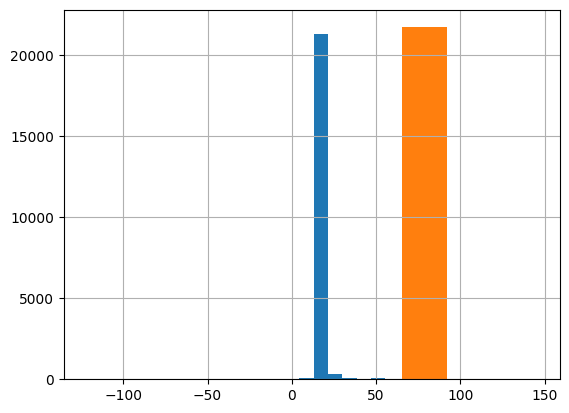

In [16]:
# 1. Check how many rows are missing lat/long together
missing_location = df[df['lat'].isnull() | df['long'].isnull()].shape[0]
print(f"Rows missing lat or long: {missing_location}")

# 2. Check if lat/long are always missing together
both_missing = df[df['lat'].isnull() & df['long'].isnull()].shape[0]
print(f"Rows where both lat and long are missing: {both_missing}")

# 3. Do petitions with or without location differ in victory rates?
df['has_location'] = df['lat'].notnull()

print("\nVictory rate by location presence:")
print(df.groupby('has_location')['is_victory'].mean())

# 4. Plot quick histogram of lat/long (if needed later)
df['lat'].hist()
df['long'].hist()




Only ~9% of petitions are missing location data, and missing values occur in pairs (both `lat` and `long`). The presence of location data does not significantly impact victory rates. These fields will be retained for geographic analyses and mapping, but no imputation will be performed. Assess way forward on imputation or variable handling for models post EDA


**Handling `targeting_description`**

In [17]:
# Check examples of missing and non-missing
print("Missing rows:")
print(df[df['targeting_description'].isnull()][['title', 'description']].head())

# Optional: Frequency of values (non-null)
print("\nTop targeting descriptions:")
print(df['targeting_description'].value_counts().head(5))

# View rows with missing targeting_description
missing_targeting = df[df['targeting_description'].isnull()]

# Display relevant context for those rows
missing_targeting[['title', 'description', 'letter_body', 'petition_status', 'original_locale']].head(10)


Missing rows:
                                                title  \
1535  NONE: avoid non-veg foods as ANIMALS are dying!   
1542  NONE: avoid non-veg foods as ANIMALS are dying!   
1549  NONE: avoid non-veg foods as ANIMALS are dying!   
1556  NONE: avoid non-veg foods as ANIMALS are dying!   
1563  NONE: avoid non-veg foods as ANIMALS are dying!   

                                            description  
1535  <p>ANIMALS ARE GETTING KILLED FOR US. AND WE A...  
1542  <p>ANIMALS ARE GETTING KILLED FOR US. AND WE A...  
1549  <p>ANIMALS ARE GETTING KILLED FOR US. AND WE A...  
1556  <p>ANIMALS ARE GETTING KILLED FOR US. AND WE A...  
1563  <p>ANIMALS ARE GETTING KILLED FOR US. AND WE A...  

Top targeting descriptions:
targeting_description
Government of India        228
Everyone                   143
Prime Minister of India    131
Government                 121
Students                   103
Name: count, dtype: int64


,title,description,letter_body,petition_status,original_locale
1535,NONE: avoid non-veg foods as ANIMALS are dying!,<p>ANIMALS ARE GETTING KILLED FOR US. AND WE A...,avoid non-veg foods as ANIMALS are dying!,active,en-IN
1542,NONE: avoid non-veg foods as ANIMALS are dying!,<p>ANIMALS ARE GETTING KILLED FOR US. AND WE A...,avoid non-veg foods as ANIMALS are dying!,active,en-IN
1549,NONE: avoid non-veg foods as ANIMALS are dying!,<p>ANIMALS ARE GETTING KILLED FOR US. AND WE A...,avoid non-veg foods as ANIMALS are dying!,active,en-IN
1556,NONE: avoid non-veg foods as ANIMALS are dying!,<p>ANIMALS ARE GETTING KILLED FOR US. AND WE A...,avoid non-veg foods as ANIMALS are dying!,active,en-IN
1563,NONE: avoid non-veg foods as ANIMALS are dying!,<p>ANIMALS ARE GETTING KILLED FOR US. AND WE A...,avoid non-veg foods as ANIMALS are dying!,active,en-IN
1570,NONE: avoid non-veg foods as ANIMALS are dying!,<p>ANIMALS ARE GETTING KILLED FOR US. AND WE A...,avoid non-veg foods as ANIMALS are dying!,active,en-IN
1577,NONE: avoid non-veg foods as ANIMALS are dying!,<p>ANIMALS ARE GETTING KILLED FOR US. AND WE A...,avoid non-veg foods as ANIMALS are dying!,active,en-IN
1584,NONE: avoid non-veg foods as ANIMALS are dying!,<p>ANIMALS ARE GETTING KILLED FOR US. AND WE A...,avoid non-veg foods as ANIMALS are dying!,active,en-IN


In [18]:
# Most common targeting descriptions
print("Top 10 most frequent targeting descriptions:")
print(df['targeting_description'].value_counts().head(10))

# Show a few unique examples for variety
print("\nSample unique targeting descriptions:")
print(df['targeting_description'].dropna().unique()[:10])


Top 10 most frequent targeting descriptions:
targeting_description
Government of India                                   228
Everyone                                              143
Prime Minister of India                               131
Government                                            121
Students                                              103
Arvind Kejriwal                                        96
People for the Ethical Treatment of Animals (PETA)     95
Indian Government                                      80
Ministry of Health and Family welfare                  80
United Nations                                         72
Name: count, dtype: int64

Sample unique targeting descriptions:
['karnataka forest department, People for the Ethical Treatment of Animals (PETA), Peta India'
 'Shri Prakash Javedkar (Cabinet Minister - Ministry of Information and Broadcasting)'
 'Municipal Commissioner of Mumbai' 'Facebook, Germany'
 'People for the Ethical Treatment of Animals (PET

In [19]:
# Group and display a sample for the top 5
for target in df['targeting_description'].value_counts().head(5).index:
    sample = df[df['targeting_description'] == target][['title', 'description']].head(1)
    print(f"\nTargeting: {target}\n{sample}")



Targeting: Government of India
                                                 title  \
783  Government of India: End of cruelities against...   

                                           description  
783  <p>This petition is made to end human crueltie...  

Targeting: Everyone
                                      title  \
7  everyone: help save panna national park.   

                                         description  
7  <p>I recently read an article about the Ken Be...  

Targeting: Prime Minister of India
                                                  title  \
3338  #RTIRules | RTI law will continue to suffer ti...   

                                            description  
3338  <p><strong>Our power to ask questions is being...  

Targeting: Government
                                    title  \
4732  Government: CANCEL 12TH BOARD EXAM!   

                                            description  
4732  <p>In the midst of rising cases in India, CBSE...  

Targeting

The 8 missing `targeting_description` values are all duplicates of the same petition (e.g., repeated titles/descriptions). Since this field typically names the recipient or group being petitioned, we’ll **impute with a placeholder** like `"Unknown"` to preserve rows for analysis.


In [20]:
# Impute missing targeting_description with 'Unknown'
df['targeting_description'] = df['targeting_description'].fillna('Unknown')


# checking for duplicates

In [21]:
# Count fully duplicated rows
full_dupes = df.duplicated().sum()
print(f"Fully duplicated rows: {full_dupes}")


Fully duplicated rows: 0


In [22]:
# Check if petition_id is unique
is_unique = df['petition_id'].is_unique
print(f"petition_id is unique: {is_unique}")

# Check for duplicate title + description
title_desc_dupes = df.duplicated(subset=['title', 'description']).sum()
print(f"Duplicate title+description rows: {title_desc_dupes}")


petition_id is unique: False
Duplicate title+description rows: 20984


In [23]:
# Count duplicates by petition_id
duplicate_ids = df['petition_id'][df['petition_id'].duplicated()].value_counts()
print(f"Number of duplicated petition_ids: {duplicate_ids.count()}")
print(duplicate_ids.head())


Number of duplicated petition_ids: 2995
petition_id
27073847    23
25127929    23
16400121    22
26099311    21
25503603    20
Name: count, dtype: int64


In [24]:
# View sample rows for a duplicated petition_id
sample_pid = duplicate_ids.index[0]
df[df['petition_id'] == sample_pid]


,Unnamed: 0,petition_id,petition_ask,created_at,original_locale,title,description,targeting_description,letter_body,end_date,...,petition_title,petition_status,calculated_goal,progress,has_victory_date,days_to_victory,has_end_date,is_active,duration_days,has_location
9932,9932,27073847,Represent All Menstruators in Sanitary Napkin ...,2021-01-28 06:49:37,en-IN,Not all women menstruate. Not all menstruators...,<p><strong>Not all women menstruate. </strong>...,"Ankit Mundra, Johnson & Johnson",Represent All Menstruators in Sanitary Napkin ...,NaT,...,Not all women menstruate. Not all menstruators...,active,25000,86.136,False,NaN,False,True,NaN,True
9939,9939,27073847,Represent All Menstruators in Sanitary Napkin ...,2021-01-28 06:49:37,en-IN,Not all women menstruate. Not all menstruators...,<p><strong>Not all women menstruate. </strong>...,"Ankit Mundra, Johnson & Johnson",Represent All Menstruators in Sanitary Napkin ...,NaT,...,Not all women menstruate. Not all menstruators...,active,25000,86.136,False,NaN,False,True,NaN,True
9946,9946,27073847,Represent All Menstruators in Sanitary Napkin ...,2021-01-28 06:49:37,en-IN,Not all women menstruate. Not all menstruators...,<p><strong>Not all women menstruate. </strong>...,"Ankit Mundra, Johnson & Johnson",Represent All Menstruators in Sanitary Napkin ...,NaT,...,Not all women menstruate. Not all menstruators...,active,25000,86.136,False,NaN,False,True,NaN,True
9953,9953,27073847,Represent All Menstruators in Sanitary Napkin ...,2021-01-28 06:49:37,en-IN,Not all women menstruate. Not all menstruators...,<p><strong>Not all women menstruate. </strong>...,"Ankit Mundra, Johnson & Johnson",Represent All Menstruators in Sanitary Napkin ...,NaT,...,Not all women menstruate. Not all menstruators...,active,25000,86.136,False,NaN,False,True,NaN,True
9960,9960,27073847,Represent All Menstruators in Sanitary Napkin ...,2021-01-28 06:49:37,en-IN,Not all women menstruate. Not all menstruators...,<p><strong>Not all women menstruate. </strong>...,"Ankit Mundra, Johnson & Johnson",Represent All Menstruators in Sanitary Napkin ...,NaT,...,Not all women menstruate. Not all menstruators...,active,25000,86.136,False,NaN,False,True,NaN,True
9967,9967,27073847,Represent All Menstruators in Sanitary Napkin ...,2021-01-28 06:49:37,en-IN,Not all women menstruate. Not all menstruators...,<p><strong>Not all women menstruate. </strong>...,"Ankit Mundra, Johnson & Johnson",Represent All Menstruators in Sanitary Napkin ...,NaT,...,Not all women menstruate. Not all menstruators...,active,25000,86.136,False,NaN,False,True,NaN,True
9974,9974,27073847,Represent All Menstruators in Sanitary Napkin ...,2021-01-28 06:49:37,en-IN,Not all women menstruate. Not all menstruators...,<p><strong>Not all women menstruate. </strong>...,"Ankit Mundra, Johnson & Johnson",Represent All Menstruators in Sanitary Napkin ...,NaT,...,Not all women menstruate. Not all menstruators...,active,25000,86.136,False,NaN,False,True,NaN,True
9981,9981,27073847,Represent All Menstruators in Sanitary Napkin ...,2021-01-28 06:49:37,en-IN,Not all women menstruate. Not all menstruators...,<p><strong>Not all women menstruate. </strong>...,"Ankit Mundra, Johnson & Johnson",Represent All Menstruators in Sanitary Napkin ...,NaT,...,Not all women menstruate. Not all menstruators...,active,25000,86.136,False,NaN,False,True,NaN,True
17850,17850,27073847,Represent All Menstruators in Sanitary Napkin ...,2021-01-28 06:49:37,en-IN,Not all women menstruate. Not all menstruators...,<p><strong>Not all women menstruate. </strong>...,"Ankit Mundra, Johnson & Johnson",Represent All Menstruators in Sanitary Napkin ...,NaT,...,Not all women menstruate. Not all menstruators...,active,25000,86.136,False,NaN,False,True,NaN,True
17857,17857,27073847,Represent All Menstruators in Sanitary Napkin ...,2021-01-28 06:49:37,en-IN,Not all women menstruate. Not all menstruators...,<p><strong>Not all women menstruate. </strong>...,"Ankit Mundra, Johnson & Johnson",Represent All Me

In [25]:
# List of columns to check for inconsistencies
check_cols = ['petition_status', 'is_victory', 'progress', 'total_signature_count',
              'created_at', 'end_date', 'victory_date', 'targeting_description', 'has_location']

# Find IDs with multiple entries
dup_ids = df['petition_id'][df['petition_id'].duplicated()].unique()

# Collect IDs that differ on any checked column
inconsistent = []
for pid in dup_ids:
    sub = df[df['petition_id'] == pid][check_cols]
    if sub.nunique().gt(1).any():
        inconsistent.append(pid)

print(f"Number of petition_ids with inconsistent values: {len(inconsistent)}")


Number of petition_ids with inconsistent values: 14


In [26]:
# Exclude IDs and fully textual fields from check
exclude_cols = ['Unnamed: 0', 'petition_id', 'petition_title', 'title', 'description', 'letter_body']
check_cols_all = [col for col in df.columns if col not in exclude_cols]

# Find inconsistent duplicates with broader coverage
inconsistent_full = []
for pid in dup_ids:
    sub = df[df['petition_id'] == pid][check_cols_all]
    if sub.nunique().gt(1).any():
        inconsistent_full.append(pid)

print(f"Number of petition_ids with ANY differences (broader check): {len(inconsistent_full)}")


Number of petition_ids with ANY differences (broader check): 17


keep latest version (assuming higher signature count = most recent)

In [27]:
# Keep row with the highest total_signature_count
df = df.sort_values(by='total_signature_count', ascending=False)
df = df.drop_duplicates(subset='petition_id', keep='first')
